```
Setting up and running Lorenz 96 model

Copyright (C) 2020  SINTEF Digital

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.
```

In [1]:
#Lets have matplotlib "inline"
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

import os
import sys

#Import packages we need
import numpy as np
import pandas as pd

#Helpful during development
import importlib
#importlib.reload(module)

import datetime
import time

from IPython.display import display

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation, rc


#Set large figure sizes
#plt.rcParams["animation.html"] = "jshtml" #Javascript 
plt.rcParams["animation.html"] = "html5" #mp4
plt.rcParams["figure.dpi"] = 100.0 #highres movies/plots

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = 'serif'

import Lorenz96

In [40]:

init_X = np.random.normal(loc=0, scale=5, size=8)
init_Y = np.random.normal(loc=0, scale=1, size=(8,8))
init_Z = np.random.normal(loc=0, scale=0.05, size=(8,8,8))


In [128]:
store_in_dropbox=True
dropbox_folder = '/home/havahol/Dropbox/phd/presentations/trial_lecture/'

colors = ['xkcd:scarlet', 'xkcd:light blue grey', 'xkcd:dark grey blue']


In [60]:

class Ensemble:
    
    def __init__(self, Ne, physical_model=True, physical_model_params=None):
        
        self.Ne = Ne
        
        self.ensemble = [None]*self.Ne
        for i in range(self.Ne):
            self.ensemble[i] = Lorenz96.Lorenz96(**physical_model_params)
            
        self.mean = None
        
    def perturb_all_states(self, loc=0, scale=1):
        for member in self.ensemble:
            member.X[member.it,:] += np.random.normal(loc=loc, scale=scale, size=member.nx)
            
        
    def step(self, T):
        for member in self.ensemble:
            member.step(T)
    
    def update_mean(self):
        self.mean = np.zeros_like(self.ensemble[0].X)
        for member in self.ensemble:
            self.mean += member.X
        self.mean /= self.Ne
            
    def getActualMean(self):
        return self.mean
    
    
    

## Ensemble of 3-layer models with random init Z

In [4]:
lorenz_input = {
    'init_X': init_X,
    #'init_Y': init_Y,
               }

In [5]:
physical_ensemble = Ensemble(50, physical_model_params=lorenz_input)
print(physical_ensemble.Ne)

50


In [9]:
%%time
physical_ensemble.step(5)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 184 µs


In [10]:
physical_ensemble.update_mean()

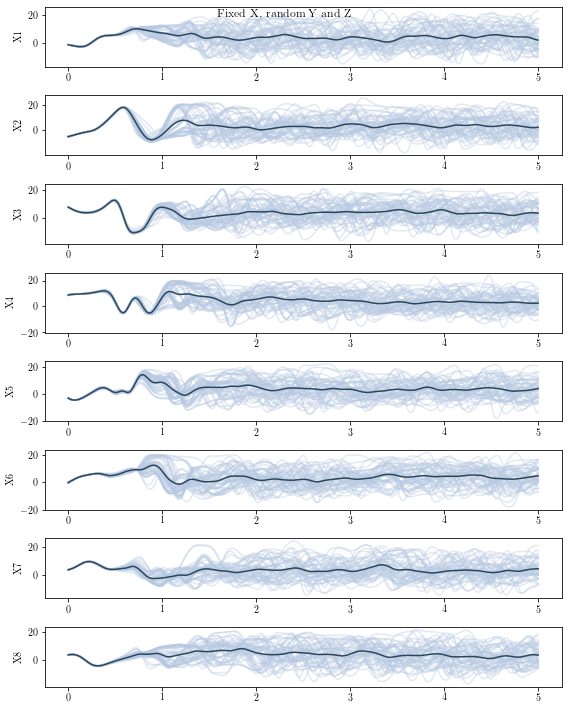

In [101]:
fig, axs = plt.subplots(8, figsize=(8,10)) #, sharex=True)
colors = ['xkcd:scarlet', 'xkcd:light blue grey', 'xkcd:dark grey blue']
t_axis = np.arange(physical_ensemble.ensemble[0].num_timesteps+1)*physical_ensemble.ensemble[0].dt
for i in range(8):

    # Plot ensemble:
    for member in physical_ensemble.ensemble:
        axs[i].plot(t_axis, member.X[:,i], color=colors[1], alpha=0.4)
    
    # Plot mean:
    axs[i].plot(t_axis, physical_ensemble.mean[:,i], color=colors[2])
    
    axs[i].set_ylabel('X'+str(i+1))
member.X[:,i].shape
plt.tight_layout()
fig.suptitle('Fixed X, random Y and Z')
if store_in_dropbox:
    fig.savefig(dropbox_folder+"lorenz_fixed_x_random_y_z.pdf")

## Comparing 1, 2 and 3 layer Lorenz-96 model

1000


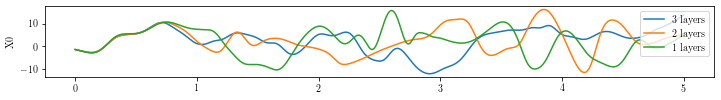

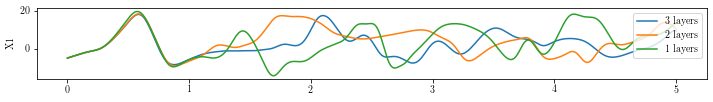

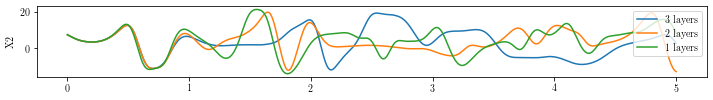

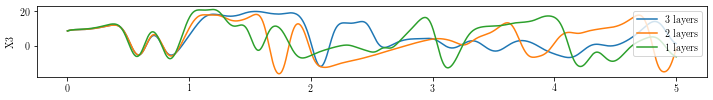

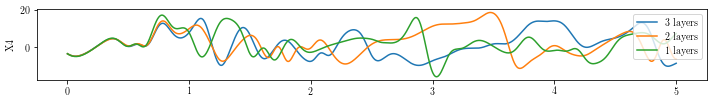

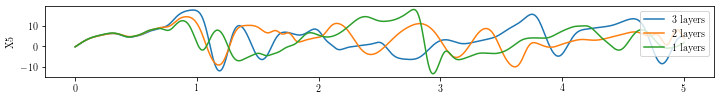

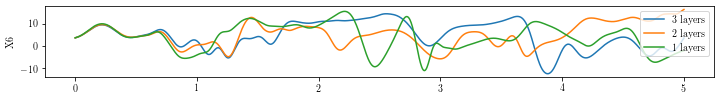

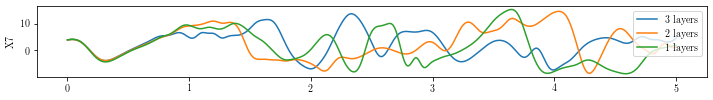

In [12]:
L96 = Lorenz96.Lorenz96(init_X=init_X, init_Y=init_Y, store_Y=True, store_Z=True)
L96_two_layer = Lorenz96.Lorenz96(init_X=init_X, init_Y=init_Y, num_layers=2)
L96_onelayer = Lorenz96.Lorenz96(init_X=init_X, num_layers=1)

L96.step(5)
L96_two_layer.step(5)
L96_onelayer.step(5)

for i in range(8):
    fig = plt.figure(figsize=(12,1.3))
    plt.plot(np.arange(L96.num_timesteps+1)*L96.dt, L96.X[:,i], label='3 layers')
    plt.plot(np.arange(L96.num_timesteps+1)*L96.dt, L96_two_layer.X[:,i], label='2 layers')
    plt.plot(np.arange(L96.num_timesteps+1)*L96.dt, L96_onelayer.X[:,i], label='1 layers')
    plt.legend(loc=1)
    plt.ylabel('X'+str(i))
print(L96.it)

### Example of values for Y and Z 

Text(0, 0.5, 'Y1')

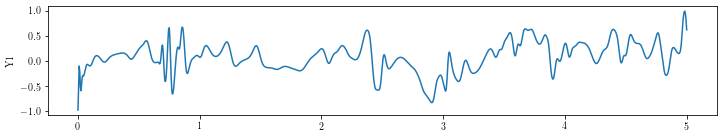

In [13]:
fig = plt.figure(figsize=(12,2))
plt.plot(np.arange(L96.num_timesteps+1)*L96.dt, L96.all_Y1[:,1])
plt.ylabel('Y1')

Text(0, 0.5, 'Z1')

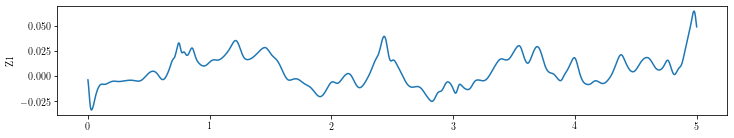

In [14]:
fig = plt.figure(figsize=(12,2))
plt.plot(np.arange(L96.num_timesteps+1)*L96.dt, L96.all_Z1[:,1])
plt.ylabel('Z1')

## Make a very small change in only one Z-variable

In [105]:
importlib.reload(Lorenz96)
end_T = 5
L96_orig = Lorenz96.Lorenz96(init_X=init_X, init_Y=init_Y, init_Z=init_Z, num_layers=3, end_T=end_T)
L96_pert = Lorenz96.Lorenz96(init_X=init_X, init_Y=init_Y, init_Z=init_Z, num_layers=3, end_T=end_T)
L96_one_layer = Lorenz96.Lorenz96(init_X=init_X, num_layers=1, end_T=end_T)

print(L96_pert.Z[2][3][6], print(np.mean(np.abs(L96_pert.Z))))

L96_pert.Z[2][3][6] += 0.001


L96_orig.step(end_T)
L96_pert.step(end_T)
L96_one_layer.step(end_T)


0.040918831018814245
-0.08629765742981892 None


1000


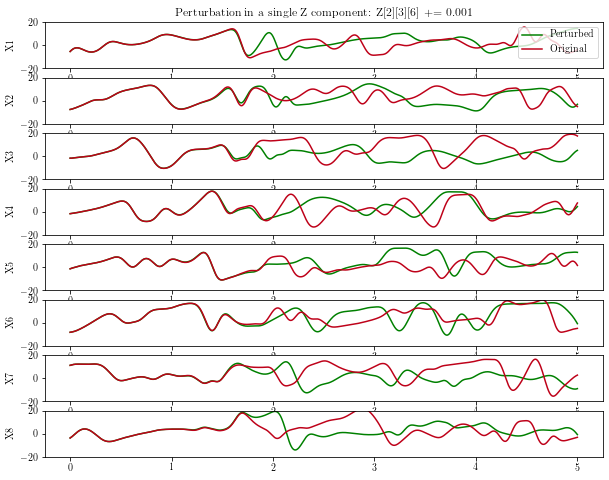

In [132]:

t_axis = np.arange(L96_orig.num_timesteps+1)*L96_orig.dt
fig, axs = plt.subplots(8, figsize=(10,8))#figsize=(8,10)) #, sharex=True)
for i in range(8):
    axs[i].plot(t_axis, L96_pert.X[:,i], label='Perturbed', color='green')
    axs[i].plot(t_axis, L96_orig.X[:,i], label='Original', color=colors[0])
    axs[i].set_ylabel('X'+str(i+1))
    axs[i].set_ylim([-20,20])
print(L96.it)
axs[0].legend(loc=1)
axs[0].set_title('Perturbation in a single Z component: Z[2][3][6] += 0.001')
#fig.tight_layout()
if store_in_dropbox:
    fig.savefig(dropbox_folder+"lorenz96_perturbed_single_z.png", dpi=200)

1000


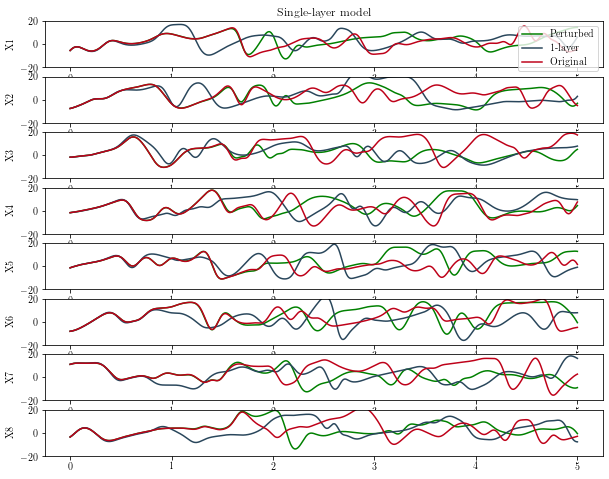

In [133]:
t_axis = np.arange(L96_orig.num_timesteps+1)*L96_orig.dt
fig, axs = plt.subplots(8, figsize=(10,8))#figsize=(8,10)) #, sharex=True)
for i in range(8):
    axs[i].plot(t_axis, L96_pert.X[:,i], label='Perturbed', color='green')
    axs[i].plot(t_axis, L96_one_layer.X[:,i], label='1-layer', color=colors[2])
    axs[i].plot(t_axis, L96_orig.X[:,i], label='Original', color=colors[0])
    axs[i].set_ylabel('X'+str(i+1))
    axs[i].set_ylim([-20,20])
print(L96.it)
axs[0].legend(loc=1)
axs[0].set_title('Single-layer model')
#fig.tight_layout()
if store_in_dropbox:
    fig.savefig(dropbox_folder+"lorenz96_perturbed_single_z_and_one_layer.pdf")    
    fig.savefig(dropbox_folder+"lorenz96_perturbed_single_z_and_one_layer.png", dpi=200)


# Create truth for DA experiment

In [56]:
%%time
end_T = 5
L96_truth = Lorenz96.Lorenz96(init_X=init_X, init_Y=init_Y, init_Z=init_Z, num_layers=3, end_T=end_T)

L96_truth.step(end_T)


CPU times: user 1.37 s, sys: 4 ms, total: 1.38 s
Wall time: 1.37 s


In [170]:

obs_dt = 0.1
obs_var = 1
obs_end = 3
num_observations = int(obs_end/obs_dt)

observation_indices = np.array([0,2,4,6])
observations = np.zeros((num_observations, 4))
observation_time_indices = np.zeros(num_observations)
observation_times = np.arange(obs_dt, obs_end+obs_dt, obs_dt)
#print(observation_times)
#print(observation_times.shape)
#print(observations.shape)


for i in range(num_observations):
    model_index = int(observation_times[i]/L96_truth.dt)
    observation_time_indices[i] = model_index
    #observation_times[i] = i*obs_dt
    observations[i, :] = L96_truth.X[model_index,0::2] + np.random.normal(loc=0, scale=1, size=4)
    
#print('--')
#print(observation_times)
#print(observations[obs_index,:])
#print(observations)

H = np.zeros((4,8))
H[0,0] = 1
H[1,2] = 1
H[2,4] = 1
H[3,6] = 1


In [171]:

observation_time_indices = observation_time_indices.astype(np.int)
save_run = True
if save_run:
    folder_name = 'data/observations_'+datetime.datetime.now().strftime("%Y_%m_%d-%H_%M_%S")
    os.makedirs(folder_name, exist_ok=True)
    
    
    np.savez(folder_name+'/observations.npz', 
             observation_indices=observation_indices,
             observations=observations,
             observation_time_indices=observation_time_indices,
             observation_times=observation_times,
             truth=L96_truth.X,
             H=H)
    


#### Compare with a Monte Carlo ensemble of 1-layer models

In [172]:
%%time

monte_carlo_input = {
    'init_X': init_X,
    'num_layers': 1
    #'init_Y': init_Y,
               }

monte_carlo_ensemble = Ensemble(50, physical_model_params=monte_carlo_input)
monte_carlo_ensemble.perturb_all_states(scale=1)

monte_carlo_ensemble.step(end_T)
monte_carlo_ensemble.update_mean()


CPU times: user 17.5 s, sys: 16 ms, total: 17.5 s
Wall time: 17.5 s


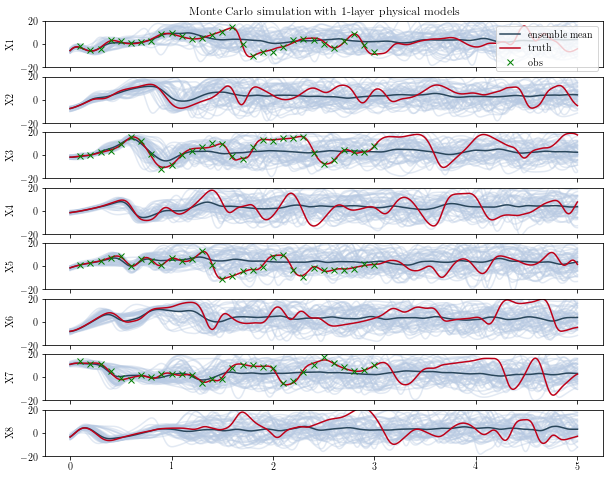

In [173]:
fig, axs = plt.subplots(8, figsize=(10,8), sharex=True)
t_axis = np.arange(L96_truth.num_timesteps+1)*L96_truth.dt
for i in range(8):

    # Plot ensemble:
    for member in monte_carlo_ensemble.ensemble:
        axs[i].plot(t_axis, member.X[:,i], color=colors[1], alpha=0.4)
    
    # Plot mean:
    axs[i].plot(t_axis, monte_carlo_ensemble.mean[:,i], color=colors[2], label='ensemble mean')
    
    axs[i].plot(t_axis, L96_truth.X[:,i], color=colors[0], label='truth')
    
    axs[i].set_ylabel('X'+str(i+1))
    axs[i].set_ylim([-20,20])

member.X[:,i].shape
axs[0].legend(loc=1)
axs[0].set_title('Monte Carlo simulation with 1-layer physical models')
#plt.tight_layout()
if store_in_dropbox:
    fig.savefig(dropbox_folder+"lorenz_monte_carlo.pdf")    
    fig.savefig(dropbox_folder+"lorenz_monte_carlo.png", dpi=200)

    
for i in range(8):
    if i%2 == 0:
        obs_index=i//2
        axs[i].plot(observation_times, observations[:,obs_index], 'x',color='green', label='obs')
axs[0].legend(loc=1)
if store_in_dropbox:
    fig.savefig(dropbox_folder+"lorenz_monte_carlo_with_obs.pdf")    
    fig.savefig(dropbox_folder+"lorenz_monte_carlo_with_obs.png", dpi=200)


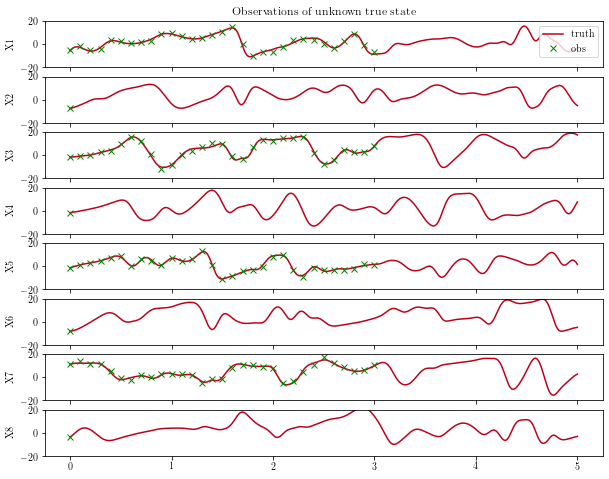

In [174]:
fig, axs = plt.subplots(8, figsize=(10,8), sharex=True)
t_axis = np.arange(L96_truth.num_timesteps+1)*L96_truth.dt
for i in range(8):

    
    axs[i].plot(t_axis, L96_truth.X[:,i], color=colors[0], label='truth')
    
    axs[i].set_ylabel('X'+str(i+1))
    axs[i].set_ylim([-20,20])

    if i%2 == 0:
        obs_index=i//2
        axs[i].plot(observation_times, observations[:,obs_index], 'x',color='green', label='obs')
    axs[i].plot(t_axis[0], L96_truth.X[0,i],  'x',color='green',)
    
member.X[:,i].shape
axs[0].legend(loc=1)
axs[0].set_title('Observations of unknown true state')
#plt.tight_layout()
if store_in_dropbox:
    fig.savefig(dropbox_folder+"truth_and_obs.pdf")    
    fig.savefig(dropbox_folder+"truth_and_obs.png", dpi=200)


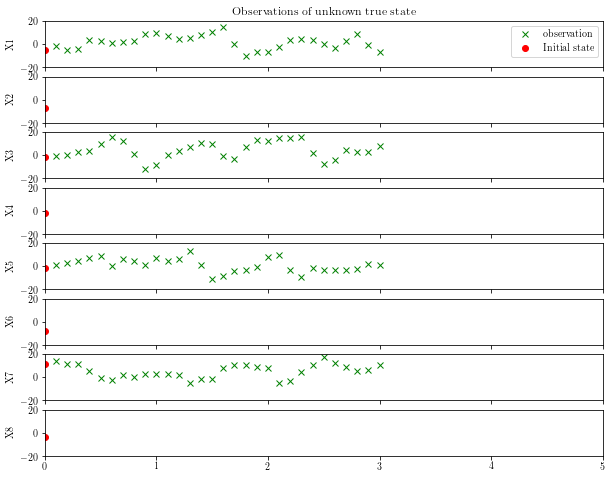

In [175]:
fig, axs = plt.subplots(8, figsize=(10,8), sharex=True)
t_axis = np.arange(L96_truth.num_timesteps+1)*L96_truth.dt
for i in range(8):

    
    
    axs[i].set_ylabel('X'+str(i+1))
    axs[i].set_ylim([-20,20])
    axs[i].set_xlim([t_axis[0],t_axis[-1]])

    if i%2 == 0:
        obs_index=i//2
        axs[i].plot(observation_times, observations[:,obs_index], 'x',color='green', label='observation')
    
member.X[:,i].shape
axs[0].legend(loc=1)
axs[0].set_title('Observations of unknown true state')
#plt.tight_layout()
if store_in_dropbox:
    fig.savefig(dropbox_folder+"observations.pdf")    
    fig.savefig(dropbox_folder+"observations.png", dpi=200)

for i in range(8):
    axs[i].plot(t_axis[0], L96_truth.X[0,i],  'o',color='red', label='Initial state')
    
axs[0].legend(loc=1)
if store_in_dropbox:
    fig.savefig(dropbox_folder+"observations_and_init.pdf")    
    fig.savefig(dropbox_folder+"observations_and_init.png", dpi=200)

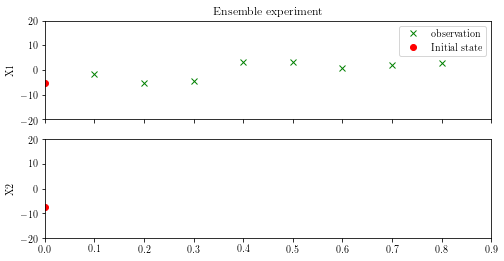

In [179]:

### CLOSE UP ON to first variables
fig, axs = plt.subplots(2, figsize=(8,4), sharex=True)
t_axis = np.arange(L96_truth.num_timesteps+1)*L96_truth.dt
for i in range(2):

    
    
    axs[i].set_ylabel('X'+str(i+1))
    axs[i].set_ylim([-20,20])
    axs[i].set_xlim([t_axis[0],t_axis[observation_time_indices[8]]])

    if i%2 == 0:
        obs_index=i//2
        axs[i].plot(observation_times[:8], observations[:8,obs_index], 'x',color='green', label='observation')
    
member.X[:,i].shape
axs[0].legend(loc=1)
axs[0].set_title('Ensemble experiment')
#plt.tight_layout()

for i in range(2):
    axs[i].plot(t_axis[0], L96_truth.X[0,i],  'o',color='red', label='Initial state')
    
axs[0].legend(loc=1)
#if store_in_dropbox:
#    fig.savefig(dropbox_folder+"observations_and_init.pdf")    
#    fig.savefig(dropbox_folder+"observations_and_init.png", dpi=200)

In [161]:
observation_time_indices[5]


240.0

## Create a long time series of X that will be used for learning


In [151]:
#MTUs for training:
training_T = 10000

#### NB!!
# Setting training_T to a smaller value, so that the notebook won't take forever
# when you press run all.
# Please comment out this line if you want to make a sufficient training data set.
training_T = 100

long_L96 = Lorenz96.Lorenz96(init_X=init_X, init_Y=init_Y, end_T=training_T)


In [153]:
long_L96.step(training_T, verbose=True)

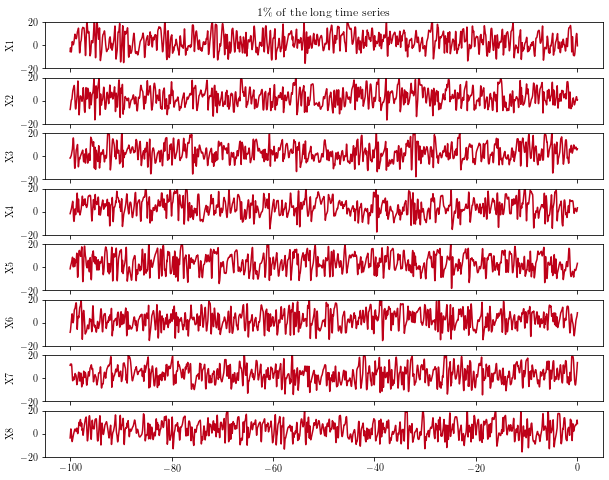

In [157]:
fig, axs = plt.subplots(8, figsize=(10,8), sharex=True)
t_axis = np.arange(long_L96.num_timesteps+1)*long_L96.dt-100
for i in range(8):

    
    axs[i].plot(t_axis, long_L96.X[:,i], color=colors[0], label='truth')
    
    axs[i].set_ylabel('X'+str(i+1))
    axs[i].set_ylim([-20,20])

axs[0].set_title('1\% of the long time series')
#plt.tight_layout()
if store_in_dropbox:
    fig.savefig(dropbox_folder+"training_timeseries.pdf")    
    fig.savefig(dropbox_folder+"training_timeseries.png", dpi=200)


In [65]:
# Normalize values
normalized_X = long_L96.X.copy()
mean = normalized_X.mean()
stddev = normalized_X.std()
normalized_X = (normalized_X - mean)/stddev

(2000001, 8)


In [83]:

save_run = True
if save_run:
    folder_name = 'data/training_data_'+datetime.datetime.now().strftime("%Y_%m_%d-%H_%M_%S")
    os.makedirs(folder_name, exist_ok=True)
    
    np.savetxt(folder_name+'/actual_run.csv', long_L96.X, delimiter=',')
    np.savetxt(folder_name+'/normalized_run.csv', normalized_X, delimiter=',')
    
    np.savez(folder_name+'/mean_and_stddev.npz', mean=mean, stddev=stddev)
    np.savez(folder_name+'/actual_run.npz', X=long_L96.X)
    np.savez(folder_name+'/normalized_run.npz', X=normalized_X)
    


NameError: name 'normalized_X' is not defined